In [14]:
dataset_path = './Data'

In [10]:
from torchvision import datasets
import torchvision
import torch
from torchvision.transforms import transforms

In [11]:
batch_size = 32 
num_workers = 0 
shuffle = True 

#Peprocessing
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])])

In [15]:

train_set = dataset_path + '/train'
valid_set = dataset_path + '/valid'

train_data = datasets.ImageFolder(train_set, transform=transform)
valid_data = datasets.ImageFolder(valid_set, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=shuffle)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=shuffle)

loaders = {
    'train': train_loader,
    'valid': valid_loader
} 

In [19]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [23]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

In [25]:
train_loader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


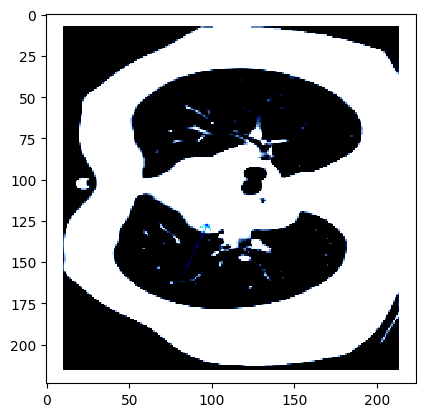

Label: 2


In [44]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.T, interpolation='nearest')
plt.show()
print(f"Label: {label}")